<a href="https://colab.research.google.com/github/dheerajreddy2020/Live-Fire-detection-and-Localization-using-surveillance-cameras/blob/master/Yolo_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drive link for the files
https://drive.google.com/drive/folders/1K9W4wN7YgzgVBl97NyWQ5_1UffEEXztx?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/YOLO_train/darknet_for_colab')

In [ ]:
import glob
#for name in glob.glob('fire_images/*.jpg'):
images_loc = glob.glob('data/fire_images/*.jpg')

In [ ]:
975-(len(images_loc)//64-2)*64

143

In [ ]:
number_of_train = 832
no_of_test = 143
train_file = open('train.txt','w')
test_file = open('test.txt','w')

for line in images_loc[:number_of_train]:
  train_file.write(line + "\n")

for line in images_loc[-no_of_test:]:
  test_file.write(line + "\n")

#train_file.writelines(images_loc[:number_of_train])
#test_file.writelines(images_loc[-no_of_test:])

## Visualizing the dataset

pic (182).txt: 
0 0.534545 0.407104 0.283636 0.431694

small (32).txt: 
0 0.482143 0.350000 0.107143 0.120000

one-candle-flame-night-closeup-260nw-121993714.txt: 
0 0.296830 0.430357 0.201729 0.432143

small (24).txt: 
0 0.352727 0.510929 0.065455 0.103825
0 0.554545 0.409836 0.076364 0.142077



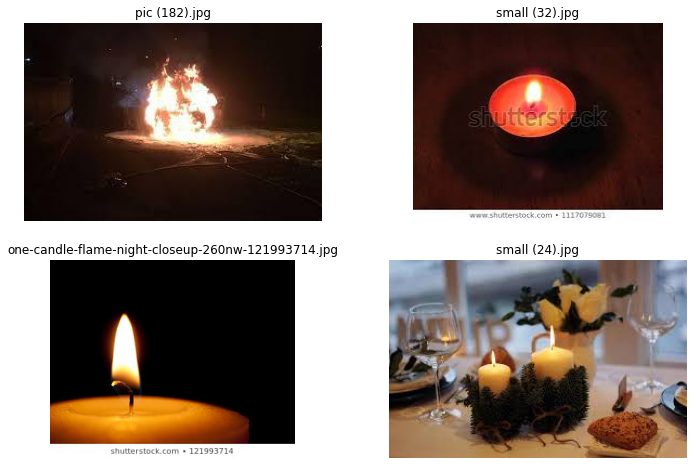

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = images_loc
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

In [ ]:
classes=1
max_batches=8000
batch=64
subdivisions=16
width=416
height=416
channels=3
momentum=0.949
decay=0.0005
learning_rate=0.001
steps= (6400,7200)
scales=(0.1,0.1)

In [ ]:
import os
import shutil

filters=(classes+5)*3
 
VARIABLE_LIST = [classes, max_batches, batch, subdivisions, width, 
                 height, channels, momentum, decay, learning_rate,
                 steps,scales, filters]

DICT_ORIGIN = {"classes":80, 
               "max_batches":8000,
               "batch":64,
               "subdivisions":16,
               "width":608,
               "height":608,
               "channels":3,
               "momentum":0.949,
               "decay":0.0005,
               "learning_rate":0.001,
               "steps": (6400,7200),
               "scales":(.1,.1),
               "filters":255}

def removefile(path):
    if os.path.isfile(path):
        os.remove(path)

def generate_custom_train(CFG_ORIGIN_PATH, CFG_FOLDER_PATH, CFG_TRAIN_FILE):
    file = open(CFG_ORIGIN_PATH + CFG_TRAIN_FILE, "rt")
    yolov4_train = file.read()
    for i, (key, value) in enumerate(DICT_ORIGIN.items()):
        if key=="steps" or key=="scales":
            processed_variable = str(VARIABLE_LIST[i]).replace("(","").replace(")","").replace(" ","")
            processed_value = str(value).replace("(","").replace(")","").replace(" ","")            
            #print(key+'='+ processed_value,key+"={:s}".format(processed_variable))
            yolov4_train = yolov4_train.replace(key+'='+ processed_value,key+"={}".format(processed_variable))
            
        else:
            yolov4_train = yolov4_train.replace(key+'='+str(value),key+"={}".format(VARIABLE_LIST[i]))
            #print(key+'='+str(value),key+"={}".format(VARIABLE_LIST[i]))    
    file.close()

    new_file = open(CFG_FOLDER_PATH + CFG_TRAIN_FILE, "wt")
    new_file.write(yolov4_train)
    new_file.close()
    print("[INFO] Generating {} successfully...".format(CFG_TRAIN_FILE))
    
def generate_custom_test(CFG_ORIGIN_PATH, CFG_FOLDER_PATH, CFG_TEST_FILE):
    file = open(CFG_ORIGIN_PATH + CFG_TEST_FILE, "rt")
    yolov4_test = file.read()
    for i, (key, value) in enumerate(DICT_ORIGIN.items()):
        if key=="batch" or key=="subdivisions":
            continue
        elif key=="steps" or key=="scales":
            processed_variable = str(VARIABLE_LIST[i]).replace("(","").replace(")","").replace(" ","")
            processed_value = str(value).replace("(","").replace(")","").replace(" ","")            
            #print(key+'='+ processed_value,key+"={:s}".format(processed_variable))
            yolov4_test = yolov4_test.replace(key+'='+ processed_value,key+"={}".format(processed_variable))
            
        else:
            yolov4_test = yolov4_test.replace(key+'='+str(value),key+"={}".format(VARIABLE_LIST[i]))
            #print(key+'='+str(value),key+"={}".format(VARIABLE_LIST[i]))    
    file.close()

    new_file = open(CFG_FOLDER_PATH + CFG_TEST_FILE, "wt")
    new_file.write(yolov4_test)
    new_file.close()
    print("[INFO] Generating {} successfully...".format(CFG_TEST_FILE))      
        
if __name__=="__main__" :
    CFG_ORIGIN_PATH='./cfg/origin/'
    CFG_TRAIN_FILE='yolov4_custom_train.cfg'
    CFG_FOLDER_PATH='./cfg/'
    CFG_TEST_FILE='yolov4_custom_test.cfg'
    
    removefile(CFG_FOLDER_PATH + CFG_TRAIN_FILE)
    removefile(CFG_FOLDER_PATH + CFG_TEST_FILE)
    
    generate_custom_train(CFG_ORIGIN_PATH,CFG_FOLDER_PATH,CFG_TRAIN_FILE)
    generate_custom_test(CFG_ORIGIN_PATH,CFG_FOLDER_PATH,CFG_TEST_FILE)
    


[INFO] Generating yolov4_custom_train.cfg successfully...
[INFO] Generating yolov4_custom_test.cfg successfully...


In [ ]:
!make
!chmod +x ./darknet
!./darknet detector train data/yolov4.data cfg/yolov4_custom_train.cfg yolov4.conv.137 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.889524, GIOU: 0.887126), Class: 0.999613, Obj: 0.902454, No Obj: 0.009634, .5R: 1.000000, .75R: 1.000000, count: 17, class_loss = 0.305657, iou_loss = 2.681884, total_loss = 2.987540 
 total_bbox = 4657298, rewritten_bbox = 0.035944 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.716068, GIOU: 0.716068), Class: 0.989214, Obj: 0.000020, No Obj: 0.000013, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.250424, iou_loss = 1.765184, total_loss = 2.015608 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.839427, GIOU: 0.836564), Class: 0.999490, Obj: 0.452019, No Obj: 0.001745, .5R: 1.000000, .75R: 0.933333, count: 15, class_loss = 1.960740, iou_loss = 7.203098, total_loss = 9.163837 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.873764, GIOU: 0.871348), Class: 0.999436, Obj: 0.813520, N

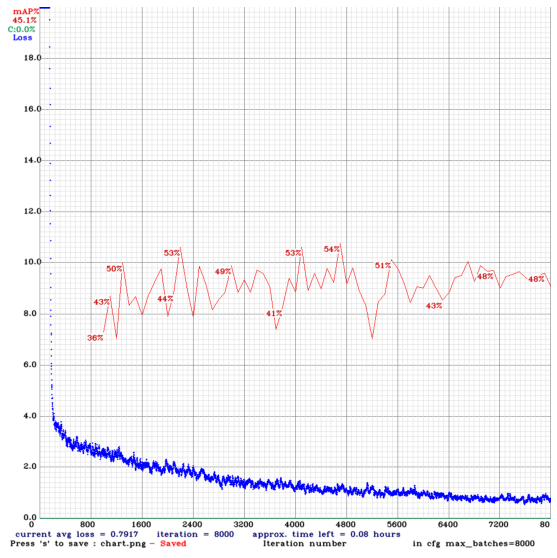

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
train_result = plt.imread("chart.png")
plt.axis(False)
plt.imshow(train_result)

In [ ]:
# cfg/coco.data was harcode in darknet, thus we need 
# to duplicate one with the same content of data/yolov4.data
%cp data/yolov4.data cfg/coco.data

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  #path.append(os.getcwd()+'/'+fn)
  !./darknet detect cfg/yolov4_custom_test.cfg backup/yolov4_custom_train_final.weights {fn} -dont-show

Saving 22.jpg to 22.jpg
 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->

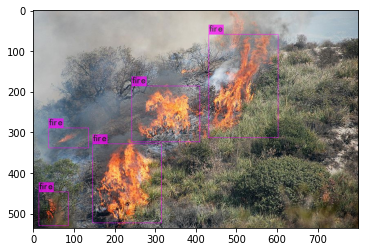

In [ ]:
import matplotlib.pyplot as plt 
#fig = plt.figure(figsize=(12,12))
#plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [ ]:
!pip install pytube

     |████████████████████████████████| 51kB 5.1MB/s 


In [ ]:
import pytube
# url to download the video from youtube
url = 'https://www.youtube.com/watch?v=Bqwh4yUyJuE&ab_channel=CGTN'
youtube = pytube.YouTube(url)
video = youtube.streams.first()
# Download the video
video.download()

'/content/drive/MyDrive/Colab Notebooks/YOLO_train/darknet_for_colab/Electric car catches fire burns passenger.mp4'

* Final Yolo weights link : https://drive.google.com/file/d/16z0mjyIfv8gONfrtpkImZ744x0SgkjIP/view?usp=sharing


In [ ]:
!python darknet_video.py -v Test_video.mp4 -c cfg/yolov4_custom_test.cfg -w backup/yolov4_custom_train_final.weights -o output.mp4

 Try to load cfg: cfg/yolov4_custom_test.cfg, weights: backup/yolov4_custom_train_final.weights, clear = 0 
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 